In [ ]:
pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [ ]:
from pickle import NONE
pd.set_option('max_row', None)

In [ ]:
jan = pd.read_csv('/content/drive/MyDrive/Portfolio_Cycle/202201-divvy-tripdata.csv')
jan.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [ ]:
jan.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [ ]:
jan['started_at'] = pd.to_datetime(jan['started_at'])
jan['ended_at'] = pd.to_datetime(jan['ended_at'])

In [ ]:
jan['duration'] = jan['ended_at']-jan['started_at']
jan['duration'].head()

0   0 days 00:02:57
1   0 days 00:04:21
2   0 days 00:04:21
3   0 days 00:14:56
4   0 days 00:06:02
Name: duration, dtype: timedelta64[ns]

In [ ]:
jan.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02


In [ ]:
jan.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    16260
start_station_id      16260
end_station_name      17927
end_station_id        17927
start_lat                 0
start_lng                 0
end_lat                  86
end_lng                  86
member_casual             0
duration                  0
dtype: int64

In [ ]:
#Check duplicate
jan.duplicated(subset=['ride_id']).sum()

0

## Start Long-Lat NULL Variable

In [ ]:
jan[jan['start_station_id'].isna()].reset_index(drop=True).head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NaN,NaN,Lockwood Ave & Wrightwood Ave,312,41.93,-87.76,41.930000,-87.760000,casual,0 days 00:03:59
1,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NaN,NaN,Ashland Ave & Grace St,13319,41.95,-87.65,41.950687,-87.668700,member,0 days 00:04:02
2,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NaN,NaN,Ashland Ave & Grace St,13319,41.92,-87.69,41.950687,-87.668700,member,0 days 00:18:10
3,A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.69,41.920771,-87.663712,member,0 days 00:12:39
4,A285AF99096A99AD,electric_bike,2022-01-14 11:10:28,2022-01-14 11:20:07,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.69,41.920771,-87.663712,member,0 days 00:09:39


In [ ]:
#assign null
jan_null = jan[jan['start_station_id'].isna()].reset_index(drop=True)

In [ ]:
jan_null.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    16260
start_station_id      16260
end_station_name      10545
end_station_id        10545
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
duration                  0
dtype: int64

## End Long-Lat NULL Variable

In [ ]:
jan[jan['end_station_id'].isna()].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
510,88276B47FFBB9910,electric_bike,2022-01-25 07:39:35,2022-01-25 07:41:01,Larrabee St & Kingsbury St,TA1306000009,NaN,NaN,41.897632,-87.643388,41.90,-87.64,member,0 days 00:01:26
512,1B66EC28DD618680,electric_bike,2022-01-21 14:26:57,2022-01-21 14:32:17,Central Park Ave & Ohio St,369,NaN,NaN,41.890000,-87.720000,41.90,-87.71,member,0 days 00:05:20
19594,20994C14E5606D05,electric_bike,2022-01-29 22:20:02,2022-01-29 22:24:20,Seeley Ave & Roscoe St,13144,NaN,NaN,41.943395,-87.679728,41.94,-87.69,member,0 days 00:04:18
19595,3C647408C8ED11FA,electric_bike,2022-01-31 08:28:21,2022-01-31 09:10:13,Spaulding Ave & Division St,15654,NaN,NaN,41.902747,-87.709244,41.92,-87.67,casual,0 days 00:41:52
19596,A1ED4CB525BE0030,electric_bike,2022-01-11 16:07:57,2022-01-11 16:26:55,Kedzie Ave & Bryn Mawr Ave,KA1504000167,NaN,NaN,41.982230,-87.708904,41.94,-87.71,casual,0 days 00:18:58


In [ ]:
#assign null variable
jan_null_end = jan[jan['end_station_id'].isna()].reset_index(drop=True)

In [ ]:
jan_null_end.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    10545
start_station_id      10545
end_station_name      17927
end_station_id        17927
start_lat                 0
start_lng                 0
end_lat                  86
end_lng                  86
member_casual             0
duration                  0
dtype: int64

##Start Long-Lat Reference Variable

In [ ]:
#Kolom referensi
jan_ref = jan.groupby(by=['start_station_id']).median().reset_index()
jan_ref.head()

,start_station_id,start_lat,start_lng,end_lat,end_lng
0,13001,41.883984,-87.624684,41.883380,-87.631890
1,13006,41.882664,-87.632530,41.884596,-87.632530
2,13008,41.881032,-87.624084,41.880958,-87.624084
3,13011,41.879255,-87.639904,41.884576,-87.636390
4,13016,41.894345,-87.622798,41.893808,-87.634362


In [ ]:
jan_ref[jan_ref.duplicated(subset=['start_lat', 'start_lng'])]

,start_station_id,start_lat,start_lng,end_lat,end_lng
273,20251.0,41.89,-87.65,41.885837,-87.639904
297,326,41.95,-87.81,41.955835,-87.712320
305,341,41.82,-87.70,41.820000,-87.700000
314,352,41.93,-87.80,41.930000,-87.810000
315,353,41.93,-87.78,41.925000,-87.765000
319,357,41.92,-87.75,41.920000,-87.750000
320,358,41.93,-87.74,41.930000,-87.750000
325,365.0,41.84,-87.73,41.850000,-87.720000
326,368.0,41.84,-87.73,41.840000,-87.710000
328,370,41.90,-87.72,41.900000,-87.710000


In [ ]:
jan_ref[(jan_ref['start_lat']==41.657074332) &  (jan_ref['start_lng']==-87.598875642)]

,start_station_id,start_lat,start_lng,end_lat,end_lng
248,20212,41.657074,-87.598876,41.66,-87.6


## End Long-Lat Reference Variable

In [ ]:
jan_ref_end = jan.groupby(by=['end_station_id']).median().reset_index()
jan_ref_end.head(5)

,end_station_id,start_lat,start_lng,end_lat,end_lng
0,13001,41.883246,-87.633502,41.883984,-87.624684
1,13006,41.884241,-87.632517,41.882664,-87.632530
2,13008,41.881032,-87.623981,41.881032,-87.624084
3,13011,41.886024,-87.634317,41.879255,-87.639904
4,13016,41.893895,-87.632326,41.894345,-87.622798


## Loop to Reference Variable

In [ ]:
#Search the nearest number FUNCTION
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [ ]:
find_nearest(jan_ref['start_lat'], 41.95)

41.95

In [ ]:
z=[]
q=[]
#START Long-Lat Loop Section
for i, x in enumerate(jan_null['start_lat']):
  z.append(x)
  new_lat = find_nearest(jan_ref['start_lat'], x)
  jan_null.iloc[i, 8] = new_lat
  ref_jan = jan_ref.loc[jan_ref['start_lat']==new_lat, 'start_lng'].reset_index(drop=True)
  #ref_null = jan_null.loc[jan_null['start_lat']==new_lat, 'start_lng']
  j=i
  new_long = find_nearest(ref_jan, jan_null.iloc[i, 9])
  jan_null.iloc[i, 9] = new_long
  q.append(j)
  jan_null.iloc[i, 5] = jan_ref.loc[(jan_ref['start_lat']==new_lat) & (jan_ref['start_lng']==new_long), 'start_station_id'].values[0]


In [ ]:
#END Long-Lat Loop Section
for i, x in enumerate(jan_null_end['end_lat']):
  z.append(x)
  new_end_lat = find_nearest(jan_ref_end['end_lat'], x)
  jan_null_end.iloc[i, 10] = new_end_lat
  ref_jan = jan_ref_end.loc[jan_ref_end['end_lat']==new_end_lat, 'end_lng'].reset_index(drop=True)
  #ref_null = jan_null.loc[jan_null['start_lat']==new_lat, 'start_lng']
  j=i
  new_end_long = find_nearest(ref_jan, jan_null_end.iloc[i, 11])
  jan_null_end.iloc[i, 11] = new_end_long
  q.append(j)
  jan_null_end.iloc[i, 7] = jan_ref_end.loc[(jan_ref_end['end_lat']==new_end_lat) & (jan_ref_end['end_lng']==new_end_long), 'end_station_id'].values[0]

In [ ]:
jan_null.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NaN,312,Lockwood Ave & Wrightwood Ave,312,41.93,-87.76,41.930000,-87.760000,casual,0 days 00:03:59
1,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NaN,431,Ashland Ave & Grace St,13319,41.95,-87.69,41.950687,-87.668700,member,0 days 00:04:02
2,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NaN,428,Ashland Ave & Grace St,13319,41.92,-87.70,41.950687,-87.668700,member,0 days 00:18:10
3,A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,NaN,20.0,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.68,41.920771,-87.663712,member,0 days 00:12:39
4,A285AF99096A99AD,electric_bike,2022-01-14 11:10:28,2022-01-14 11:20:07,NaN,20.0,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.68,41.920771,-87.663712,member,0 days 00:09:39


In [ ]:
jan_null_end.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,88276B47FFBB9910,electric_bike,2022-01-25 07:39:35,2022-01-25 07:41:01,Larrabee St & Kingsbury St,TA1306000009,NaN,20249.0,41.897632,-87.643388,41.90,-87.63,member,0 days 00:01:26
1,1B66EC28DD618680,electric_bike,2022-01-21 14:26:57,2022-01-21 14:32:17,Central Park Ave & Ohio St,369,NaN,370,41.890000,-87.720000,41.90,-87.72,member,0 days 00:05:20
2,20994C14E5606D05,electric_bike,2022-01-29 22:20:02,2022-01-29 22:24:20,Seeley Ave & Roscoe St,13144,NaN,435,41.943395,-87.679728,41.94,-87.69,member,0 days 00:04:18
3,3C647408C8ED11FA,electric_bike,2022-01-31 08:28:21,2022-01-31 09:10:13,Spaulding Ave & Division St,15654,NaN,20254.0,41.902747,-87.709244,41.92,-87.65,casual,0 days 00:41:52
4,A1ED4CB525BE0030,electric_bike,2022-01-11 16:07:57,2022-01-11 16:26:55,Kedzie Ave & Bryn Mawr Ave,KA1504000167,NaN,434,41.982230,-87.708904,41.94,-87.71,casual,0 days 00:18:58


In [ ]:
#Loop Station Name
qw=[]
for i, x in enumerate(jan_null['start_station_id']):
  qw.append(x)
  jan_null.iloc[i, 4] = jan.loc[jan['start_station_id']==x, 'start_station_name'].values[0]

In [ ]:
#Loop Station ID
qw=[]
for i, x in enumerate(jan_null_end['end_station_id']):
  qw.append(x)
  jan_null_end.iloc[i, 6] = jan.loc[jan['end_station_id']==x, 'end_station_name'].values[0]

In [ ]:
jan_null.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,Lockwood Ave & Wrightwood Ave,312,Lockwood Ave & Wrightwood Ave,312,41.93,-87.76,41.930000,-87.760000,casual,0 days 00:03:59
1,565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,Western Ave & Grace St,431,Ashland Ave & Grace St,13319,41.95,-87.69,41.950687,-87.668700,member,0 days 00:04:02
2,C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,Milwaukee Ave & Fullerton Ave,428,Ashland Ave & Grace St,13319,41.92,-87.70,41.950687,-87.668700,member,0 days 00:18:10
3,A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,Damen Ave & Wabansia Ave,20.0,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.68,41.920771,-87.663712,member,0 days 00:12:39
4,A285AF99096A99AD,electric_bike,2022-01-14 11:10:28,2022-01-14 11:20:07,Damen Ave & Wabansia Ave,20.0,Southport Ave & Clybourn Ave,TA1309000030,41.91,-87.68,41.920771,-87.663712,member,0 days 00:09:39


In [ ]:
jan_null_end.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,88276B47FFBB9910,electric_bike,2022-01-25 07:39:35,2022-01-25 07:41:01,Larrabee St & Kingsbury St,TA1306000009,N Clark St & W Elm St,20249.0,41.897632,-87.643388,41.90,-87.63,member,0 days 00:01:26
1,1B66EC28DD618680,electric_bike,2022-01-21 14:26:57,2022-01-21 14:32:17,Central Park Ave & Ohio St,369,Central Park & Augusta Blvd,370,41.890000,-87.720000,41.90,-87.72,member,0 days 00:05:20
2,20994C14E5606D05,electric_bike,2022-01-29 22:20:02,2022-01-29 22:24:20,Seeley Ave & Roscoe St,13144,Rockwell St & Fletcher St,435,41.943395,-87.679728,41.94,-87.69,member,0 days 00:04:18
3,3C647408C8ED11FA,electric_bike,2022-01-31 08:28:21,2022-01-31 09:10:13,Spaulding Ave & Division St,15654,W Armitage Ave & N Sheffield Ave,20254.0,41.902747,-87.709244,41.92,-87.65,casual,0 days 00:41:52
4,A1ED4CB525BE0030,electric_bike,2022-01-11 16:07:57,2022-01-11 16:26:55,Kedzie Ave & Bryn Mawr Ave,KA1504000167,Albany Ave & Belmont Ave,434,41.982230,-87.708904,41.94,-87.71,casual,0 days 00:18:58


In [ ]:
jan_null.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name        0
start_station_id          0
end_station_name      10545
end_station_id        10545
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
duration                  0
dtype: int64

In [ ]:
jan_null_end.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    10545
start_station_id      10545
end_station_name          0
end_station_id            0
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
duration                  0
dtype: int64

In [ ]:
jan[jan['start_station_name'].isna()].isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    16260
start_station_id      16260
end_station_name      10545
end_station_id        10545
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
duration                  0
dtype: int64

## Loop to Main Variable

In [ ]:
qw=[]
#Joining two table for start_station
for i, x in enumerate(jan['ride_id']):
  if pd.isna(jan['start_station_name'].iloc[i]):
    
    jan.iloc[i,4] = jan_null.loc[jan_null['ride_id']==x, 'start_station_name'].values[0]
    jan.iloc[i,5] = jan_null.loc[jan_null['ride_id']==x, 'start_station_id'].values[0]
  else:
    qw.append(i)
    continue

In [ ]:
#Joining two table for end_station
for i, x in enumerate(jan['ride_id']):
  if pd.isna(jan['end_station_name'].iloc[i]):
    
    jan.iloc[i,6] = jan_null_end.loc[jan_null_end['ride_id']==x, 'end_station_name'].values[0]
    jan.iloc[i,7] = jan_null_end.loc[jan_null_end['ride_id']==x, 'end_station_id'].values[0]
  else:
    qw.append(i)
    continue

In [ ]:
jan.isna().sum()

ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name       0
end_station_id         0
start_lat              0
start_lng              0
end_lat               86
end_lng               86
member_casual          0
duration               0
dtype: int64

In [ ]:
jan.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02


## Drop Final NULL Values

In [ ]:
jan.shape

(103770, 14)

In [ ]:
jan.dropna(inplace=True)

In [ ]:
jan.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
duration              0
dtype: int64

In [ ]:
jan.shape

(103684, 14)

In [ ]:
jan.to_csv('/content/drive/MyDrive/Portfolio_Cycle/jan_final.csv', index=False)

# Data Exploration

In [ ]:
jan22 = pd.read_csv('/content/drive/MyDrive/Portfolio_Cycle/jan_final.csv')
jan22.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02


In [ ]:
jan22.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
duration              0
dtype: int64

In [ ]:
jan22['started_at'] = pd.to_datetime(jan22['started_at'])
jan22['ended_at'] = pd.to_datetime(jan22['ended_at'])

In [ ]:
for i, x in enumerate(jan22['ride_id']):
  jan22['duration'].iloc[i] = (jan22['ended_at'].iloc[i]-jan22['started_at'].iloc[i]).total_seconds()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
jan22['duration'] = jan22['duration'].astype(int)

In [ ]:
jan22.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
duration                       int64
dtype: object

## Rideable Type

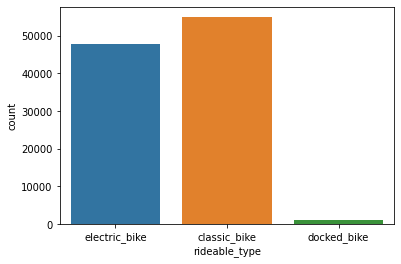

In [ ]:
sns.countplot(x='rideable_type', data=jan22)
plt.show()

- slight difference between electric and classic, and not enough interest for docked bike

<AxesSubplot: xlabel='rideable_type', ylabel='duration'>

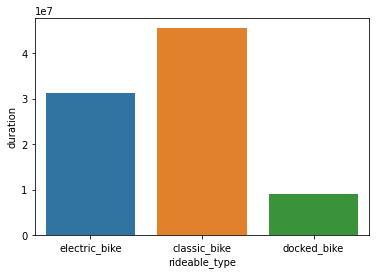

In [ ]:
sns.barplot(x='rideable_type', y='duration', data=jan22, estimator=sum, ci=None)

<AxesSubplot: xlabel='rideable_type', ylabel='duration'>

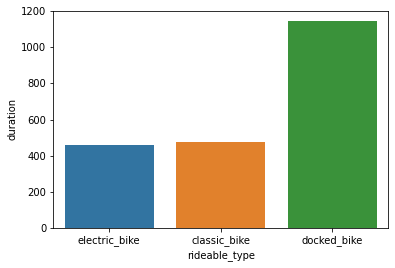

In [ ]:
sns.barplot(x='rideable_type', y='duration', estimator=np.median, data=jan22, ci=None)

- classic bike still dominates total duration (seconds)
- despite the low usage, most of the docked bike user has a much longer duration per user than electric bike and classic bike

### Type Specific Time

#### Day Sum

<AxesSubplot: xlabel='started_at', ylabel='duration'>

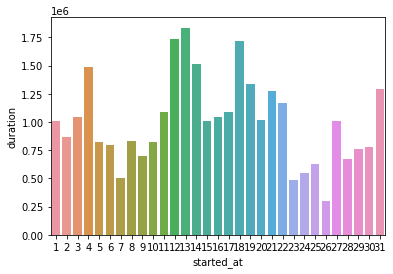

In [ ]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22[jan22['rideable_type']=='electric_bike'], estimator=sum, ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

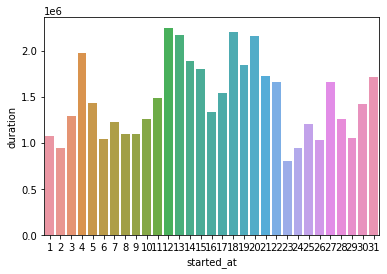

In [ ]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22[jan22['rideable_type']=='classic_bike'], estimator=sum, ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

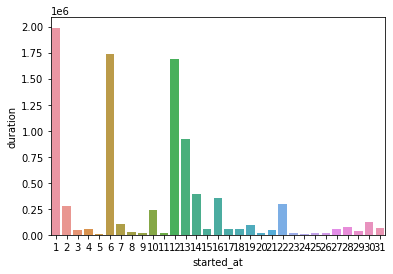

In [ ]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22[jan22['rideable_type']=='docked_bike'], estimator=sum, ci=None)

- electric bike and classic bike has similar distribution
- docked bike has abnormal behaviour pattern

#### Day MEDIAN

<AxesSubplot: xlabel='started_at', ylabel='duration'>

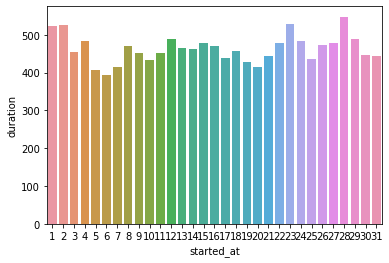

In [ ]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22[jan22['rideable_type']=='electric_bike'], estimator=np.median, ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

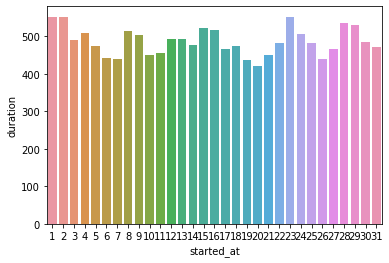

In [ ]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22[jan22['rideable_type']=='classic_bike'], estimator=np.median, ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

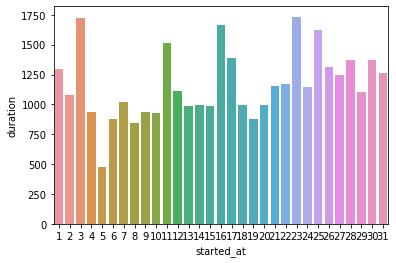

In [ ]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22[jan22['rideable_type']=='docked_bike'], estimator=np.median, ci=None)

#### Time SUM

<AxesSubplot: xlabel='started_at', ylabel='duration'>

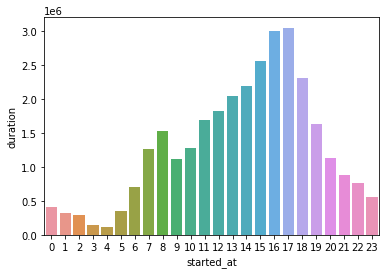

In [ ]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22[jan22['rideable_type']=='electric_bike'], estimator=sum, ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

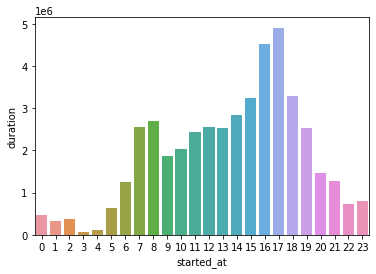

In [ ]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22[jan22['rideable_type']=='classic_bike'], estimator=sum, ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

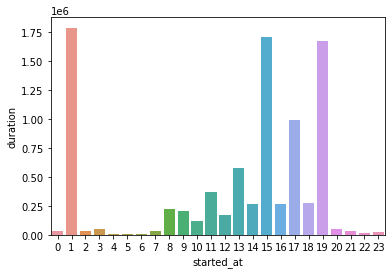

In [ ]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22[jan22['rideable_type']=='docked_bike'], estimator=sum, ci=None)

- docked has abnormal pattern

#### Time MEDIAN

<AxesSubplot: xlabel='started_at', ylabel='duration'>

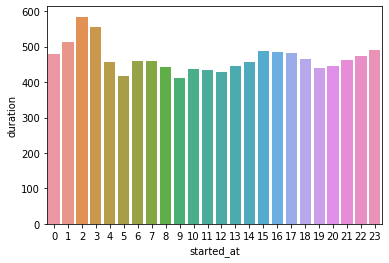

In [ ]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22[jan22['rideable_type']=='electric_bike'], estimator=np.median, ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

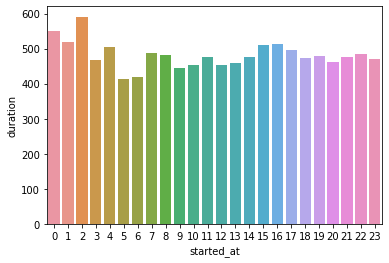

In [ ]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22[jan22['rideable_type']=='classic_bike'], estimator=np.median, ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

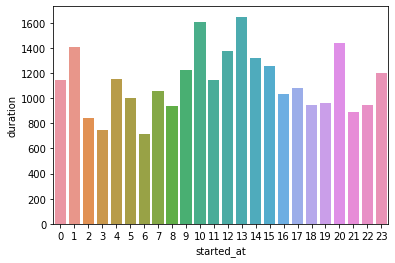

In [ ]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22[jan22['rideable_type']=='docked_bike'], estimator=np.median, ci=None)

## Member or Casual

### Member Type

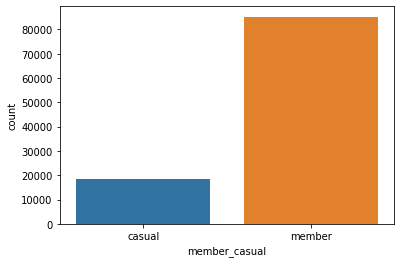

In [ ]:
sns.countplot(x='member_casual', data=jan22)
plt.show()

- most of the user is registered as member

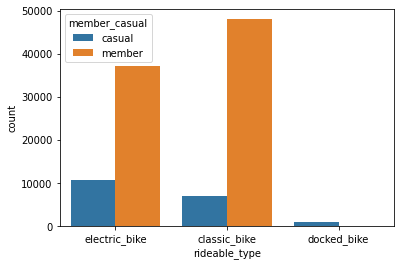

In [ ]:
sns.countplot(x='rideable_type', hue='member_casual', data=jan22)
plt.show()

- docked bike doesnt have member user, it might reserved for casual user (?)

<AxesSubplot: xlabel='member_casual', ylabel='duration'>

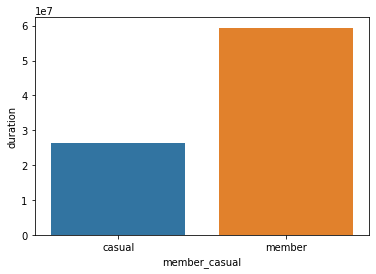

In [ ]:
sns.barplot(x='member_casual', y='duration', data=jan22, estimator=sum, ci=None)

<AxesSubplot: xlabel='member_casual', ylabel='duration'>

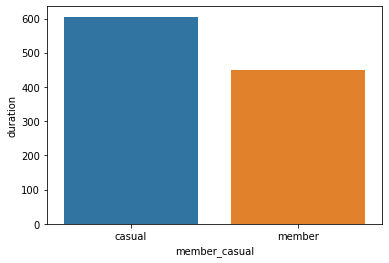

In [ ]:
sns.barplot(x='member_casual', y='duration', estimator=np.median, data=jan22, ci=None)

<AxesSubplot: xlabel='rideable_type', ylabel='duration'>

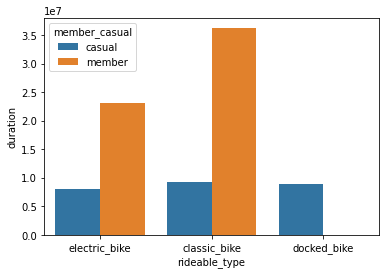

In [ ]:
sns.barplot(x='rideable_type', y='duration', hue='member_casual', data=jan22, estimator=sum, ci=None)

<AxesSubplot: xlabel='rideable_type', ylabel='duration'>

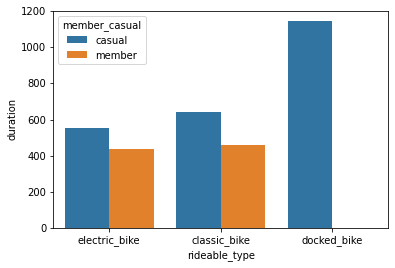

In [ ]:
sns.barplot(x='rideable_type', y='duration', hue='member_casual', estimator=np.median, data=jan22, ci=None)

- member use more duration on the trip overall
- per casual user overall has more duration than per member user (especially docked bike user)

### Member Specific Time

#### Day SUM

<AxesSubplot: xlabel='started_at', ylabel='duration'>

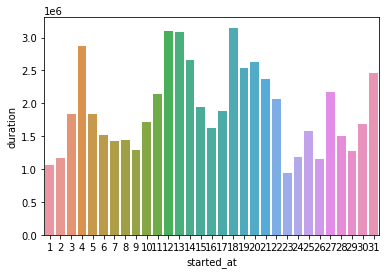

In [ ]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='member'], ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

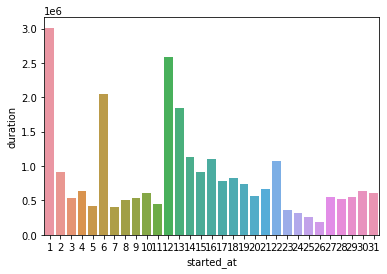

In [ ]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='casual'], ci=None)

#### Day MEDIAN

<AxesSubplot: xlabel='started_at', ylabel='duration'>

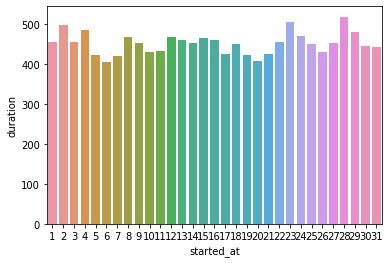

In [ ]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', estimator=np.median, data=jan22[jan22['member_casual']=='member'], ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

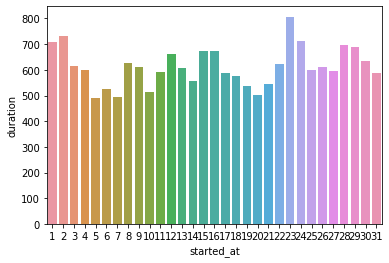

In [ ]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', estimator=np.median, data=jan22[jan22['member_casual']=='casual'], ci=None)

#### Day of The Week SUM

<AxesSubplot: xlabel='started_at', ylabel='duration'>

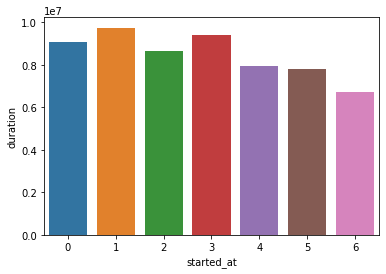

In [ ]:
sns.barplot(x=jan22['started_at'].dt.dayofweek, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='member'], ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

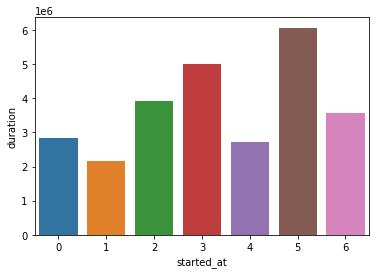

In [ ]:
sns.barplot(x=jan22['started_at'].dt.dayofweek, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='casual'], ci=None)

- Most of the member users are working force or student because most of the users are at Monday-Friday (0-4)

#### Day of The Week MEDIAN

<AxesSubplot: xlabel='started_at', ylabel='duration'>

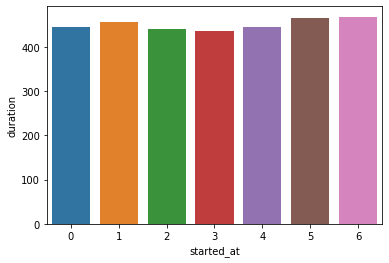

In [ ]:
sns.barplot(x=jan22['started_at'].dt.dayofweek, y='duration', estimator=np.median, data=jan22[jan22['member_casual']=='member'], ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

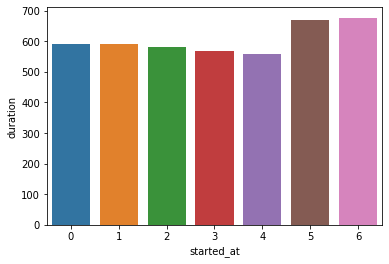

In [ ]:
sns.barplot(x=jan22['started_at'].dt.dayofweek, y='duration', estimator=np.median, data=jan22[jan22['member_casual']=='casual'], ci=None)

- Since most of the member only use for daily activity (working, school, commute) it has lower median value than casual user throughout the week
- Casual user has more median value, especially at Saturday & Sunday (5-6) which is the weekend. It is suspected most of the casual user uses this service for sightseing and not for daily necessities.

#### Time SUM

<AxesSubplot: xlabel='started_at', ylabel='duration'>

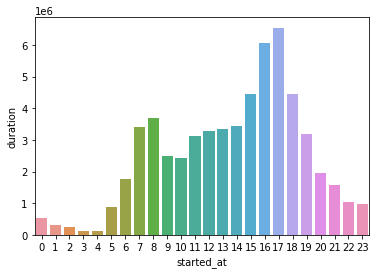

In [ ]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='member'], ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

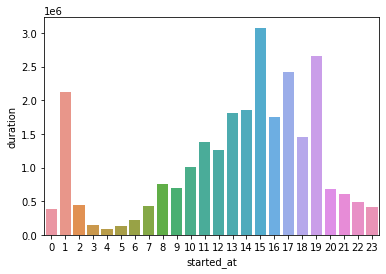

In [ ]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='casual'], ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

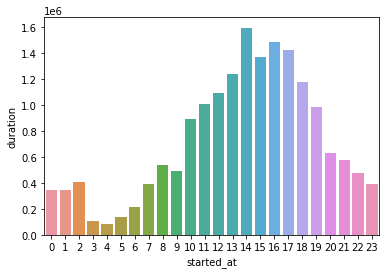

In [ ]:
#Casual but without docked bike
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', estimator=sum, data=jan22[(jan22['member_casual']=='casual')
& (jan22['rideable_type']!='docked_bike')], ci=None)

- docked_bike in casual user causes irregularity (sharper peak-valley)
- mostly has the same pattern between member and casual (without dokcked_bike)

#### Time MEDIAN

<AxesSubplot: xlabel='started_at', ylabel='duration'>

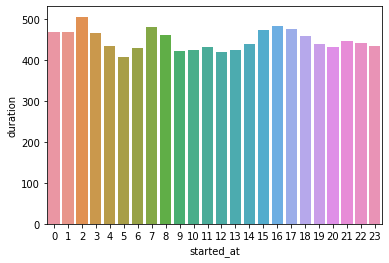

In [ ]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', estimator=np.median, data=jan22[jan22['member_casual']=='member'], ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

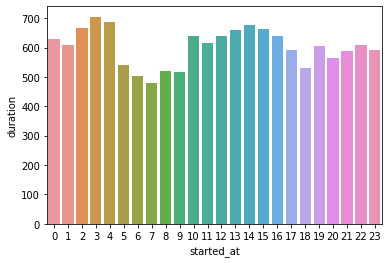

In [ ]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', estimator=np.median, data=jan22[jan22['member_casual']=='casual'], ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

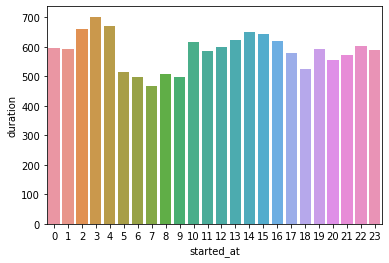

In [ ]:
#Casual but without docked bike
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', estimator=np.median, data=jan22[(jan22['member_casual']=='casual')
& (jan22['rideable_type']!='docked_bike')], ci=None)

- Median didnt really affected by the outlier since it only choose the middle number

## Specific Time

### Which days

<AxesSubplot: xlabel='started_at', ylabel='count'>

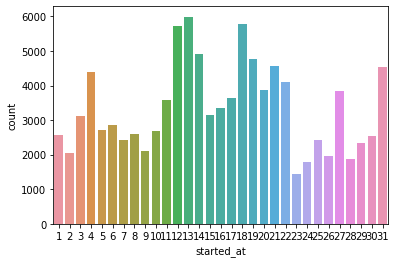

In [ ]:
sns.countplot(x=jan22['started_at'].dt.day, data=jan22)

- theres no specific distribution regarding frequency due to days
- roughly more people using bike service during middle of the month

<AxesSubplot: xlabel='started_at', ylabel='duration'>

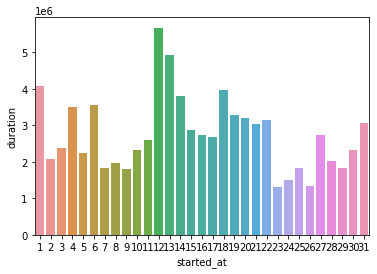

In [ ]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22, estimator=sum, ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

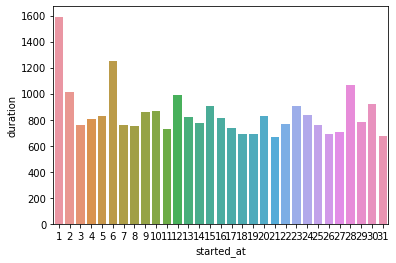

In [ ]:
sns.barplot(x=jan22['started_at'].dt.day, y='duration', data=jan22, ci=None)

- on total, middle of this month has mostly more user
- on average, there is a balance distrubition except for anomaly at 1st January

### Day of The Week

<AxesSubplot: xlabel='started_at', ylabel='count'>

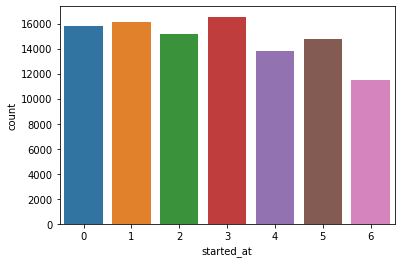

In [ ]:
sns.countplot(x=jan22['started_at'].dt.dayofweek, data=jan22)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

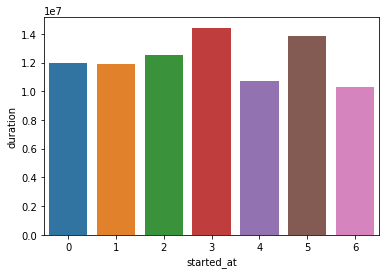

In [ ]:
sns.barplot(x=jan22['started_at'].dt.dayofweek, y='duration', estimator=sum, data=jan22, ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

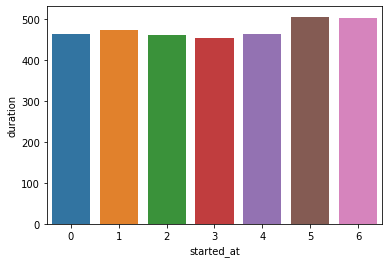

In [ ]:
sns.barplot(x=jan22['started_at'].dt.dayofweek, y='duration', estimator=np.median, data=jan22, ci=None)

### Which hour

<AxesSubplot: xlabel='started_at', ylabel='count'>

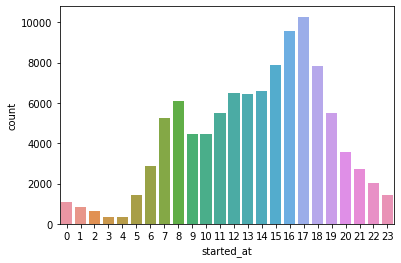

In [ ]:
sns.countplot(x=jan22['started_at'].dt.hour, data=jan22)

- most of users are during working/school hours

<AxesSubplot: xlabel='started_at', ylabel='duration'>

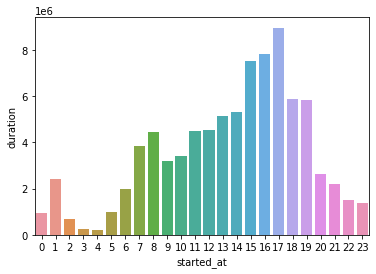

In [ ]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22, estimator=sum, ci=None)

<AxesSubplot: xlabel='started_at', ylabel='duration'>

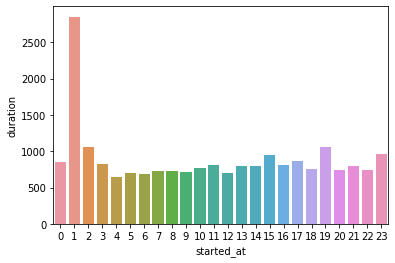

In [ ]:
sns.barplot(x=jan22['started_at'].dt.hour, y='duration', data=jan22, ci=None)

- total of duration is similar to number of count
- average of duration is uniform, except anomaly at 01.00 AM

### Anomaly

In [ ]:
#Let's take a look at the Anomaly!
jan22[jan22['started_at'].dt.hour==1].describe()

,start_lat,start_lng,end_lat,end_lng,duration
count,854.000000,854.000000,854.000000,854.000000,8.540000e+02
mean,41.907041,-87.656179,41.907867,-87.659242,2.850761e+03
std,0.050174,0.031125,0.051566,0.032864,6.009289e+04
min,41.670000,-87.800000,41.670000,-87.810000,0.000000e+00
25%,41.889906,-87.670000,41.889906,-87.677335,3.110000e+02
50%,41.910210,-87.650000,41.912616,-87.653449,5.245000e+02
75%,41.939397,-87.634656,41.940000,-87.638779,9.577500e+02
max,42.058239,-87.551254,42.057044,-87.551208,1.756266e+06


In [ ]:
jan22[jan22['duration']==1756266.0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
47695,578BA30BA1348F18,docked_bike,2022-01-01 01:00:05,2022-01-21 08:51:11,Millennium Park,13008,Fairfield Ave & Roosevelt Rd,KA1504000102,41.881032,-87.624084,41.866624,-87.694521,casual,1756266


- there is a user that ride at 20 days starting at 1 January until 21 January (wow!) starting from 1 AM

## Station Name

### Most Popular Count

<AxesSubplot: xlabel='start_station_name', ylabel='count'>

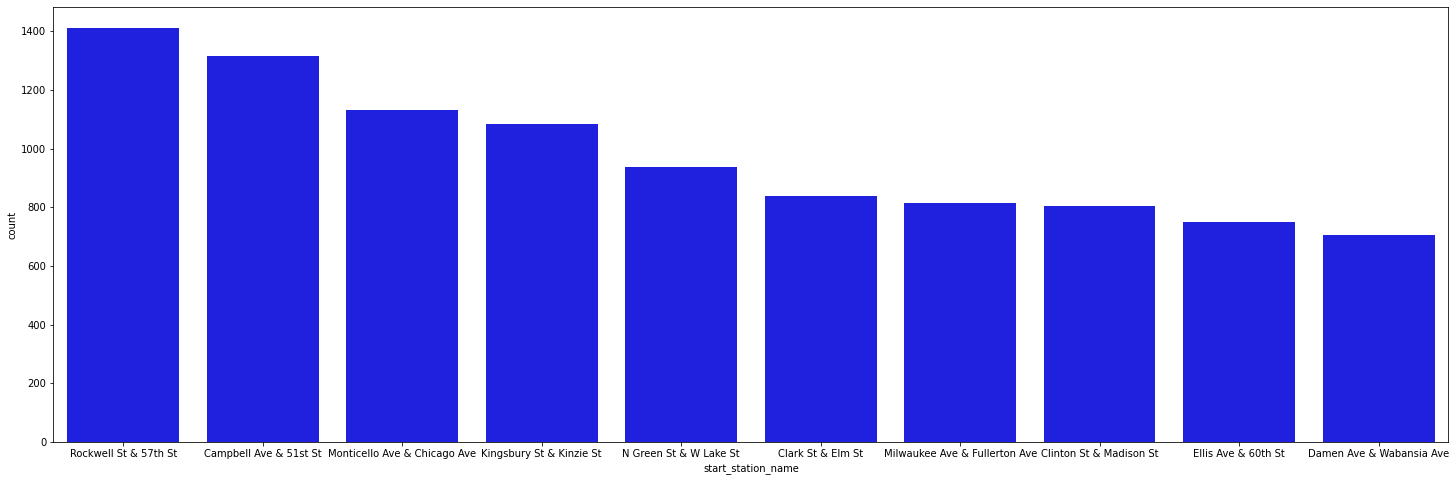

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(x='start_station_name', data=jan22, color='b',
              order=jan22['start_station_name'].value_counts().iloc[:10].index)

<AxesSubplot: xlabel='end_station_name', ylabel='count'>

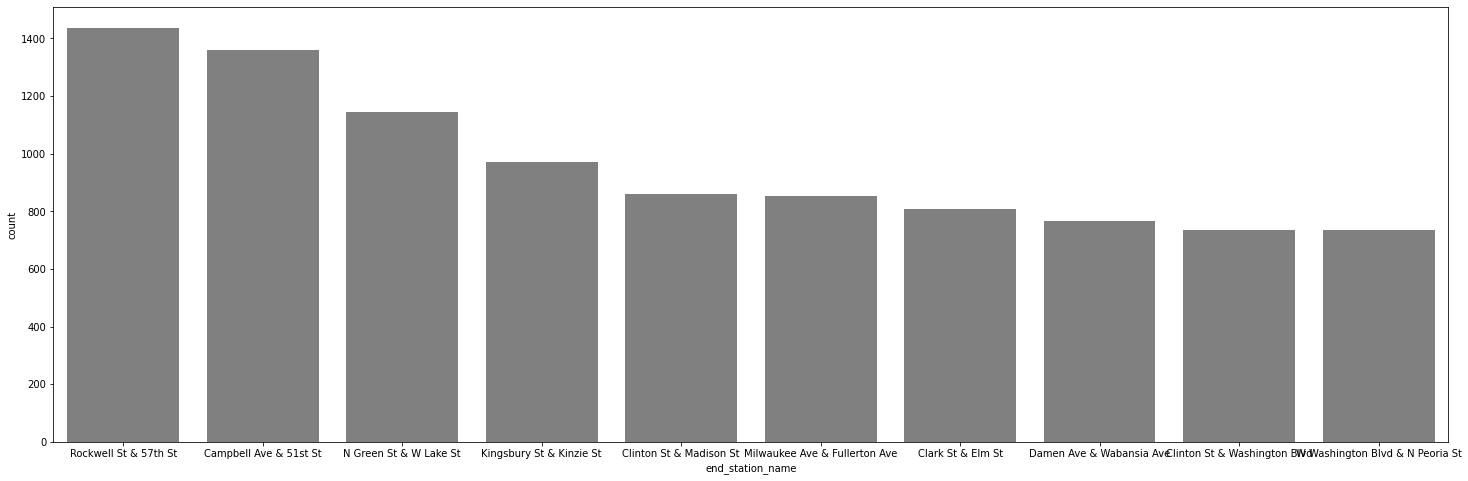

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(x='end_station_name', data=jan22, color='grey',
              order=jan22['end_station_name'].value_counts().iloc[:10].index)

- rockwell, campbell, n green, clark, milwaukee ave, clinton, damen ave. 9 out of 10 most popular starting point station also is one of the most popular destination spot.
- it means the most popular station is cathering toward industry or academic spot (for transit)

### Most Popular Duration

In [ ]:
order_start10 = jan22.groupby('start_station_name')['duration'].sum().nlargest(10)
order_start10

start_station_name
Wabash Ave & Grand Ave          2294220
Millennium Park                 2182466
Sedgwick St & Schiller St       1177192
Broadway & Belmont Ave          1037630
Campbell Ave & 51st St           957316
Monticello Ave & Chicago Ave     828231
N Green St & W Lake St           804589
Rockwell St & 57th St            681510
Clark St & Elm St                647799
St. Clair St & Erie St           634573
Name: duration, dtype: int64

<AxesSubplot: xlabel='start_station_name', ylabel='duration'>

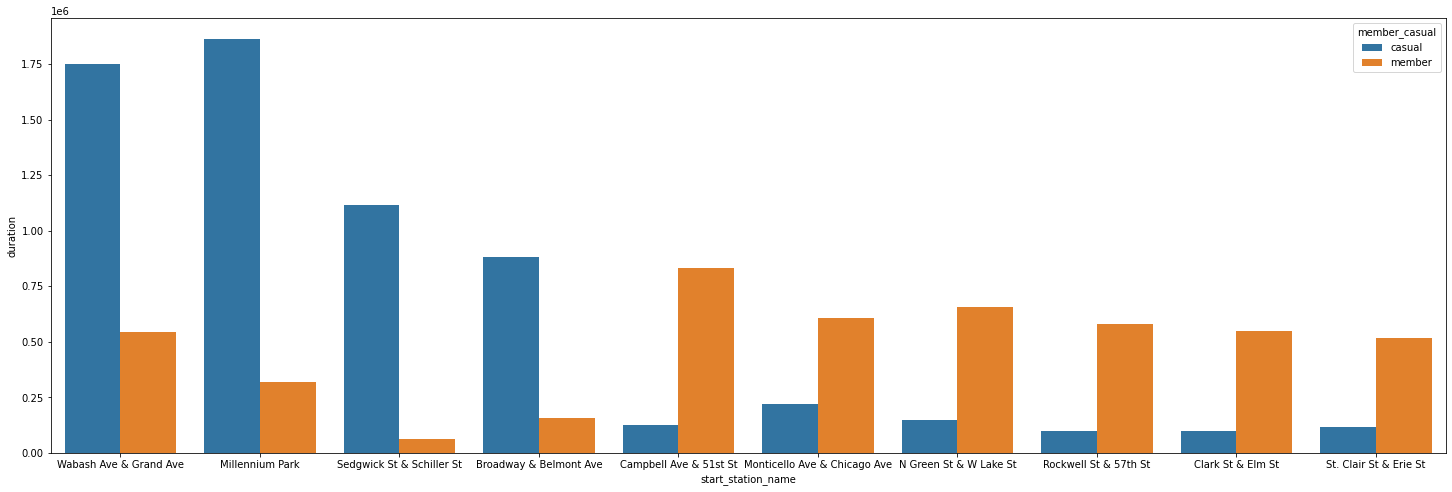

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='start_station_name', y='duration', hue='member_casual', data=jan22, estimator=sum, order=order_start10.index, ci=None)

In [ ]:
order_end10 = jan22.groupby('end_station_name')['duration'].sum().nlargest(10)
order_end10

end_station_name
N Green St & W Lake St                2195874
Base - 2132 W Hubbard Warehouse       2151872
Fairfield Ave & Roosevelt Rd          1770969
W Washington Blvd & N Peoria St       1415029
Campbell Ave & 51st St                1218832
Washtenaw Ave & Polk St                975904
Avers Ave & Belmont Ave                907372
N Sheffield Ave & W Wellington Ave     844103
Damen Ave & Wabansia Ave               827444
Larrabee St & Division St              705574
Name: duration, dtype: int64

<AxesSubplot: xlabel='end_station_name', ylabel='duration'>

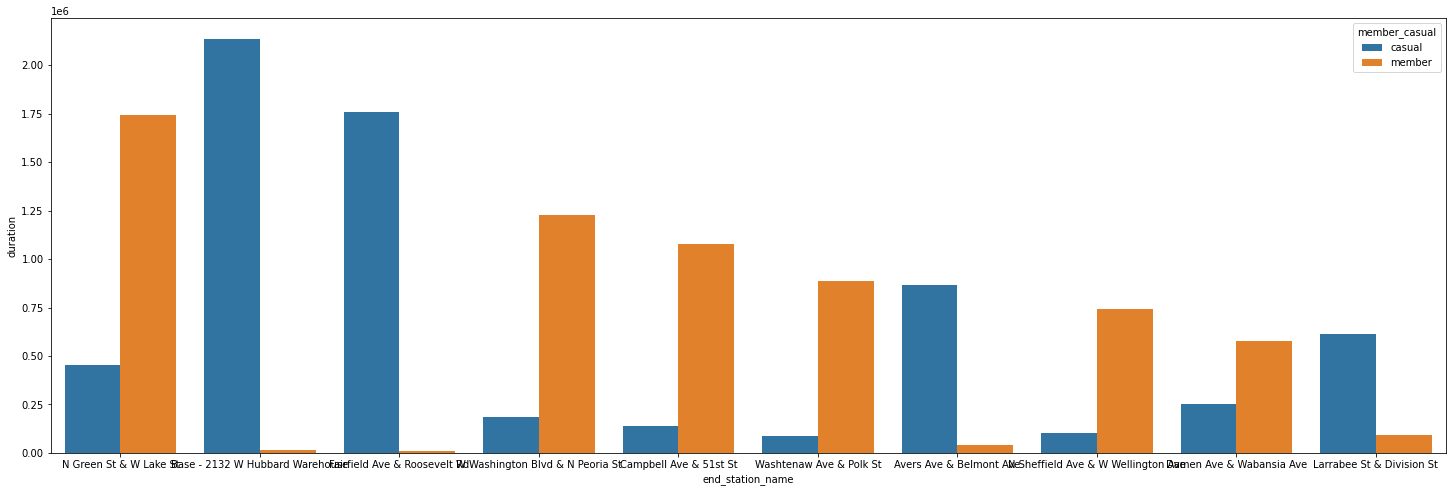

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='end_station_name', y='duration', hue='member_casual', data=jan22, estimator=sum, order=order_end10.index, ci=None)

#### Most Popular Member Station

In [ ]:
member_start10 = jan22[jan22['member_casual']=='member'].groupby('start_station_name')['duration'].sum().nlargest(10)
member_start10

start_station_name
Campbell Ave & 51st St          833876
N Green St & W Lake St          655818
Monticello Ave & Chicago Ave    606384
Rockwell St & 57th St           582082
University Ave & 57th St        557921
Clark St & Elm St               550021
Wabash Ave & Grand Ave          543513
St. Clair St & Erie St          515870
Kingsbury St & Kinzie St        513452
Indiana Ave & Roosevelt Rd      481551
Name: duration, dtype: int64

In [ ]:
member_end10 = jan22[jan22['member_casual']=='member'].groupby('end_station_name')['duration'].sum().nlargest(10)
member_end10

end_station_name
N Green St & W Lake St                1743434
W Washington Blvd & N Peoria St       1227418
Campbell Ave & 51st St                1078533
Washtenaw Ave & Polk St                888462
N Sheffield Ave & W Wellington Ave     740283
Rockwell St & 57th St                  638017
Damen Ave & Wabansia Ave               577177
Wabash Ave & Grand Ave                 523508
Francisco Ave & Montrose Ave           455776
Kingsbury St & Kinzie St               432291
Name: duration, dtype: int64

<AxesSubplot: xlabel='start_station_name', ylabel='duration'>

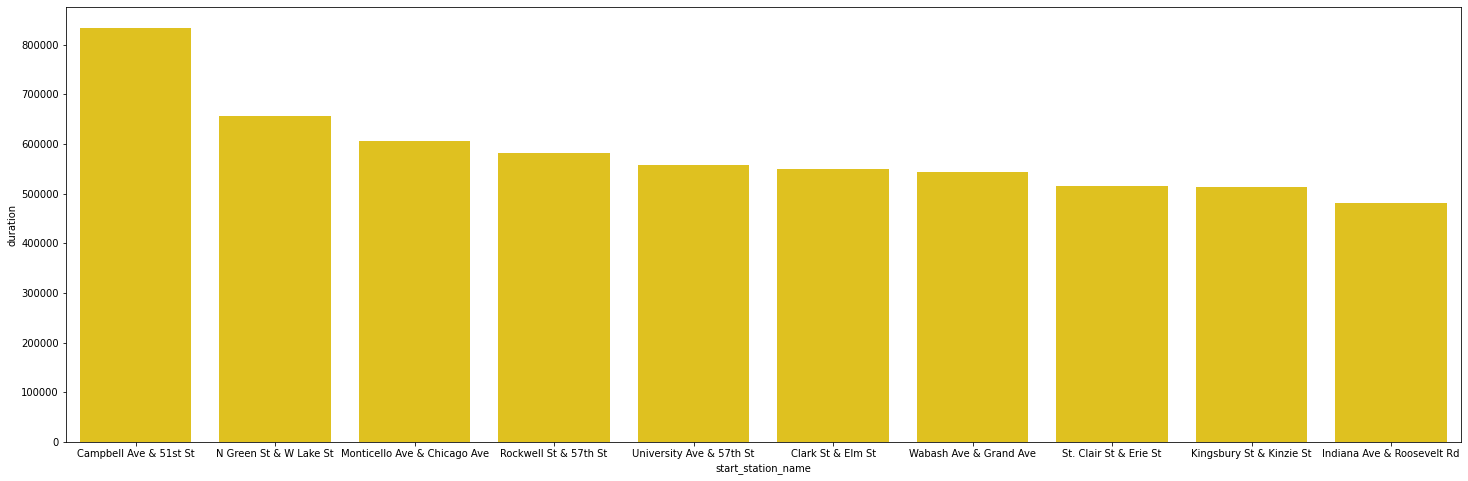

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='start_station_name', y='duration', data=jan22[jan22['member_casual']=='member'], estimator=sum, color='gold', order=member_start10.index, ci=None)

<AxesSubplot: xlabel='end_station_name', ylabel='duration'>

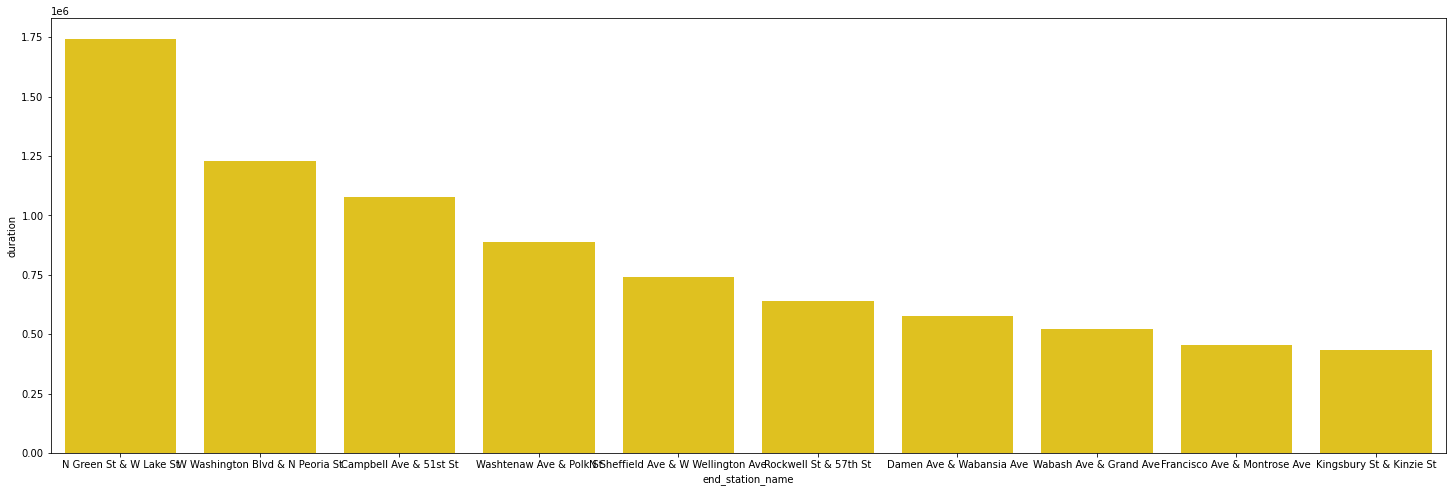

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='end_station_name', y='duration', data=jan22[jan22['member_casual']=='member'], estimator=sum, color='gold', order=member_end10.index, ci=None)

#### Most Popular Casual Station

In [ ]:
casual_start10 = jan22[jan22['member_casual']=='casual'].groupby('start_station_name')['duration'].sum().nlargest(10)
casual_start10

start_station_name
Millennium Park                      1864189
Wabash Ave & Grand Ave               1750707
Sedgwick St & Schiller St            1115248
Broadway & Belmont Ave                882506
Larrabee St & Webster Ave             423281
Shedd Aquarium                        352566
Sheffield Ave & Wrightwood Ave        270386
DuSable Lake Shore Dr & Monroe St     237319
Stony Island Ave & 90th St            225368
Monticello Ave & Chicago Ave          221847
Name: duration, dtype: int64

<AxesSubplot: xlabel='start_station_name', ylabel='duration'>

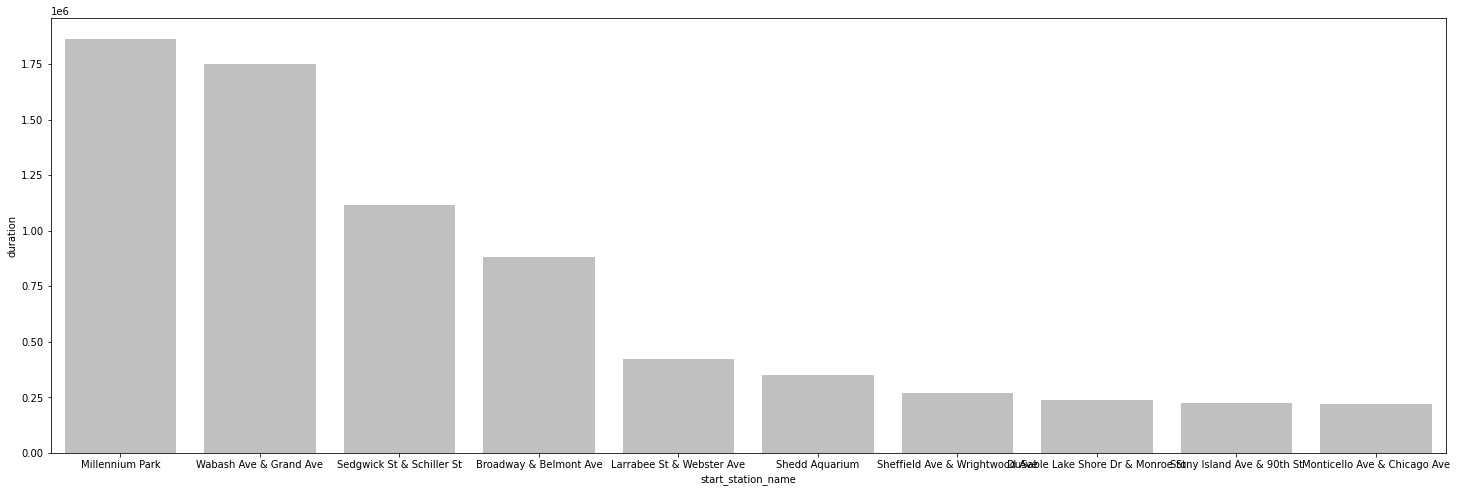

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='start_station_name', y='duration', data=jan22[jan22['member_casual']=='casual'], estimator=sum, order=casual_start10.index, color='silver', ci=None)

### Least Popular Count

<AxesSubplot: xlabel='start_station_name', ylabel='count'>

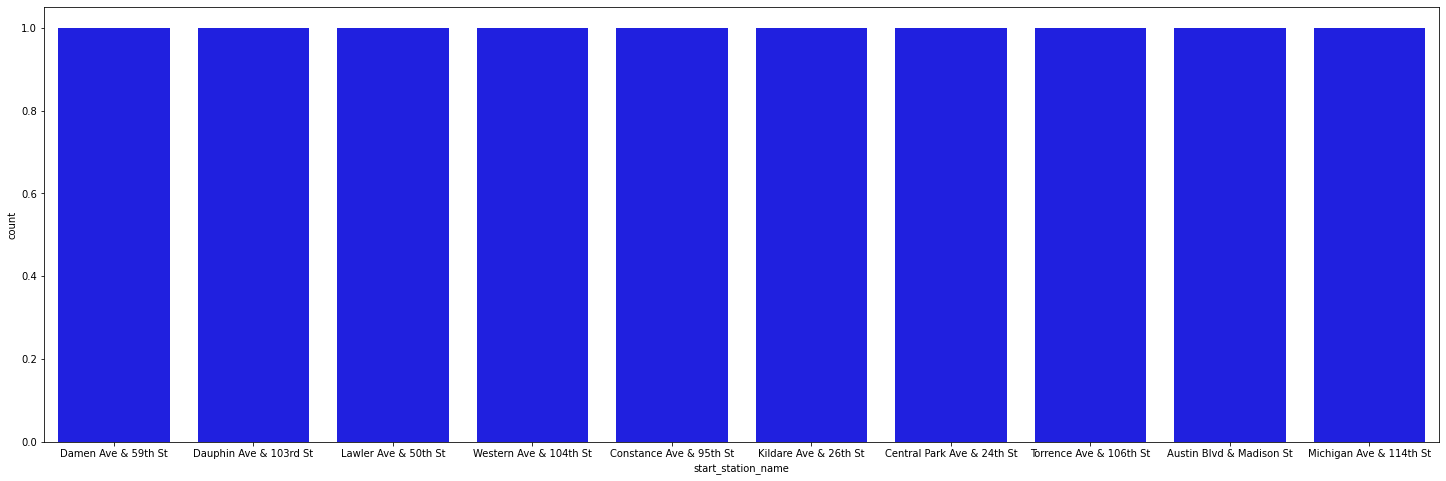

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(x='start_station_name', data=jan22, color='blue',
              order=jan22['start_station_name'].value_counts().sort_values(ascending=True).iloc[:10].index)

<AxesSubplot: xlabel='end_station_name', ylabel='count'>

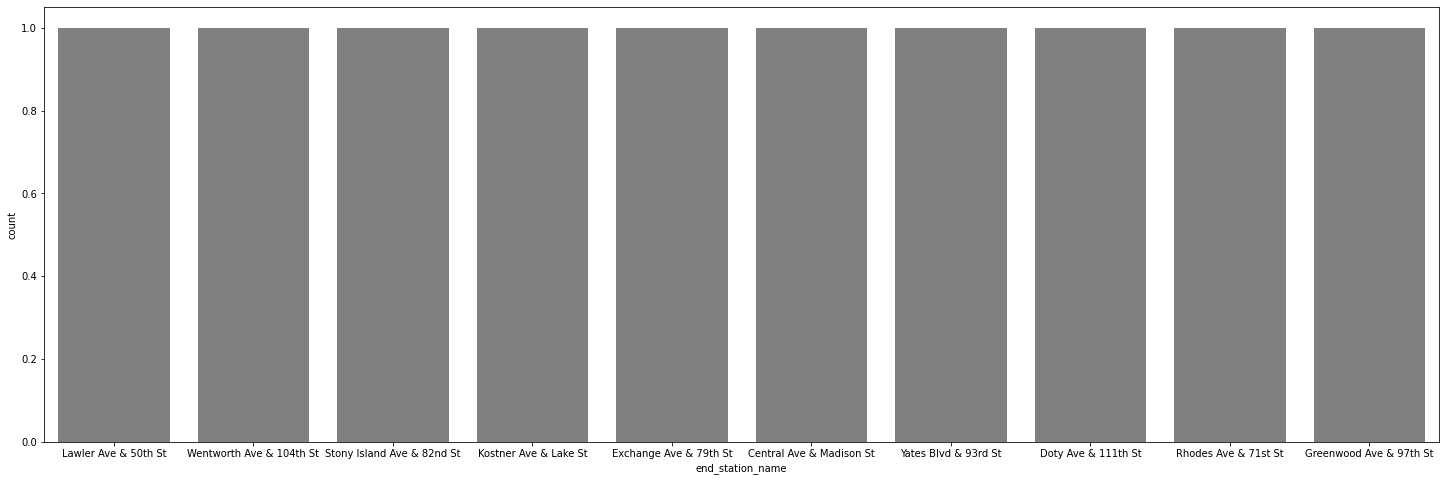

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(x='end_station_name', data=jan22, color='grey',
              order=jan22['end_station_name'].value_counts().sort_values(ascending=True).iloc[:10].index)

- all of the least popular station only has 1 user this month
- either these are outlier or user tend to use station in other street within the same area

### Top 10 Popular

In [ ]:
#Top10
top10_start = jan22['start_station_name'].value_counts().iloc[:10].index
top10_end = jan22['end_station_name'].value_counts().iloc[:10].index
print(top10_start)
print(top10_end)

Index(['Rockwell St & 57th St', 'Campbell Ave & 51st St',
       'Monticello Ave & Chicago Ave', 'Kingsbury St & Kinzie St',
       'N Green St & W Lake St', 'Clark St & Elm St',
       'Milwaukee Ave & Fullerton Ave', 'Clinton St & Madison St',
       'Ellis Ave & 60th St', 'Damen Ave & Wabansia Ave'],
      dtype='object')
Index(['Rockwell St & 57th St', 'Campbell Ave & 51st St',
       'N Green St & W Lake St', 'Kingsbury St & Kinzie St',
       'Clinton St & Madison St', 'Milwaukee Ave & Fullerton Ave',
       'Clark St & Elm St', 'Damen Ave & Wabansia Ave',
       'Clinton St & Washington Blvd', 'W Washington Blvd & N Peoria St'],
      dtype='object')


<AxesSubplot: xlabel='start_station_name', ylabel='duration'>

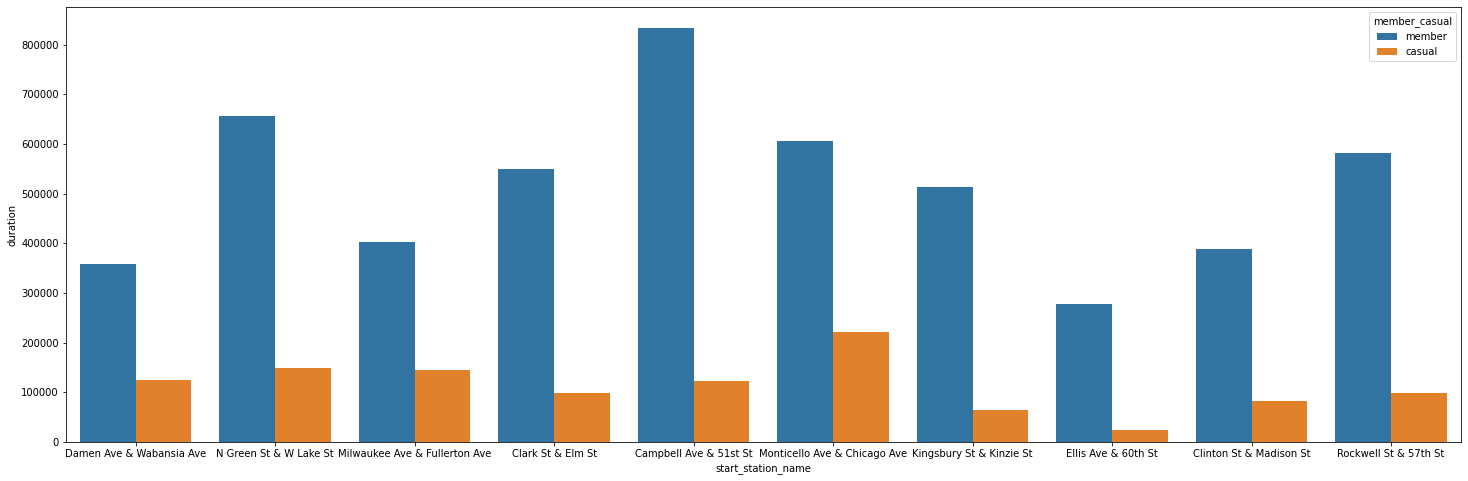

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='start_station_name', y='duration', hue='member_casual', data=jan22[jan22['start_station_name'].isin(top10_start)], estimator=sum, ci=None)

<AxesSubplot: xlabel='end_station_name', ylabel='duration'>

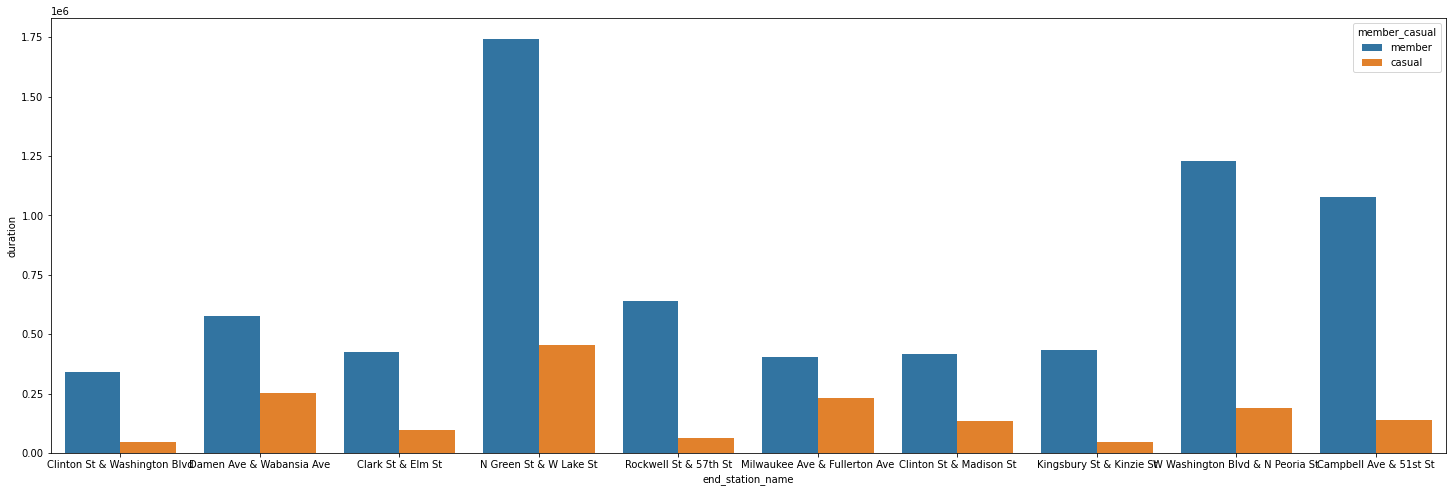

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='end_station_name', y='duration', hue='member_casual', data=jan22[jan22['end_station_name'].isin(top10_end)], estimator=sum, ci=None)

# Data Visualization

## Ratio of Membership and Casual User

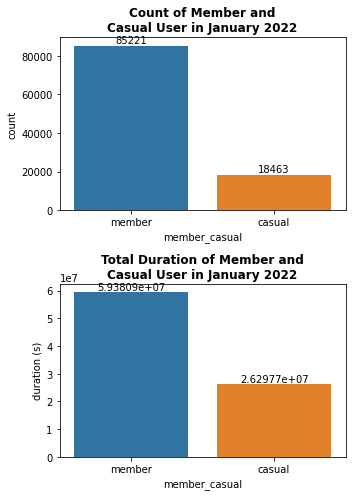

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(5,7))
ax0 = sns.countplot(x=jan22['member_casual'].sort_values(ascending=False), data=jan22, ax=axes[0])
ax1 = sns.barplot(x=jan22['member_casual'].sort_values(ascending=False), y='duration', estimator=sum, data=jan22, ci=None, ax=axes[1])
ax0.set_title('Count of Member and\nCasual User in January 2022', fontweight='bold')
ax0.bar_label(ax0.containers[0])
ax1.set_title('Total Duration of Member and\nCasual User in January 2022', fontweight='bold')
ax1.bar_label(ax1.containers[0])
ax1.set_ylabel('duration (s)')                                                                                                                                
plt.tight_layout()

- We can see at January 2022, most of the rides frequency is from Member user
- Most of the user duration also mostly from member user

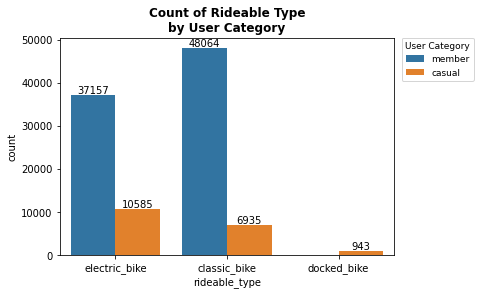

In [ ]:
ax0 = sns.countplot(x='rideable_type', hue=jan22['member_casual'].sort_values(ascending=False), data=jan22)
ax0.set_title('Count of Rideable Type\nby User Category', fontweight='bold')
for bars in ax0.containers:
        ax0.bar_label(bars)
plt.legend(title='User Category', title_fontsize=9, loc='center right', bbox_to_anchor=(1, 0.4, 0.25, 1), fontsize=9)

- We can see docked bike is reserved for casual user

## Is Docked Bike Worth Keeping?

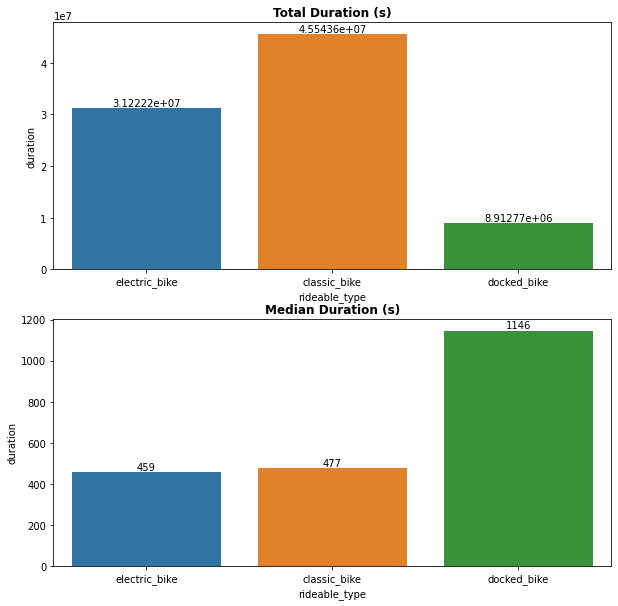

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
ax0 = sns.barplot(x='rideable_type', y='duration', data=jan22, estimator=sum, ci=None, ax=axes[0])
ax1 = sns.barplot(x='rideable_type', y='duration', data=jan22, estimator=np.median, ci=None, ax=axes[1])
ax0.set_title('Total Duration (s)', fontweight='bold')
for bars in ax0.containers:
        ax0.bar_label(bars)
ax1.set_title('Median Duration (s)', fontweight='bold')
for bars in ax1.containers:
        ax1.bar_label(bars)

- Despite the low count of use in Janury, it's still contributing quite decent in the total duration
- Docked bike user have much higher duration per user than other rideable type, which has great potential compared to other type

## Difference Between Casual and Member User

Text(0.5, 0, 'Day of The Week')

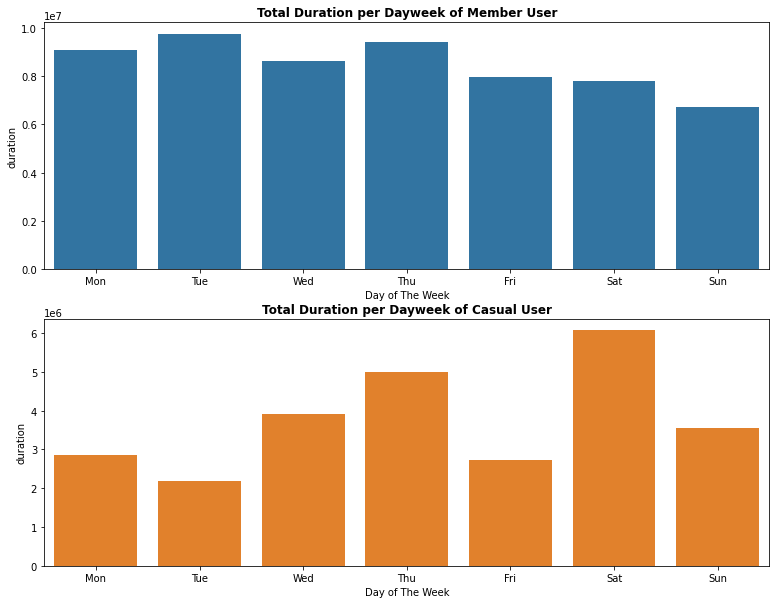

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(13,10))
ax0 = sns.barplot(x=jan22['started_at'].dt.dayofweek, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='member'], 
                  ax=axes[0], color='C0', ci=None)
ax1 = sns.barplot(x=jan22['started_at'].dt.dayofweek, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='casual'], 
            ax=axes[1], color='C1', ci=None)
ax0.set_title('Total Duration per Dayweek of Member User', fontweight='bold')
ax0.set_xlabel('Day of The Week')
ax0.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax1.set_title('Total Duration per Dayweek of Casual User', fontweight='bold')
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax1.set_xlabel('Day of The Week')

- Member user has high uses on weekdays
- Casual user has irregular pattern but the highest peak is during weekend

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

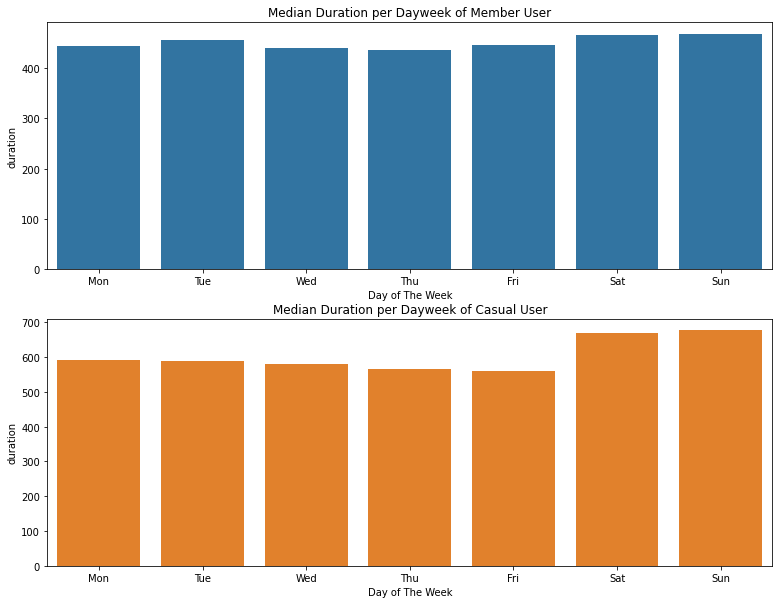

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(13,10))
ax0 = sns.barplot(x=jan22['started_at'].dt.dayofweek, y='duration', estimator=np.median, data=jan22[jan22['member_casual']=='member'],
            ax=axes[0], color='C0', ci=None)
ax0.set_title('Median Duration per Dayweek of Member User')
ax0.set_xlabel('Day of The Week')
ax0.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax1 = sns.barplot(x=jan22['started_at'].dt.dayofweek, y='duration', estimator=np.median, data=jan22[jan22['member_casual']=='casual'],
            ax=axes[1], color='C1', ci=None)
ax1.set_xlabel('Day of The Week')
ax1.set_title('Median Duration per Dayweek of Casual User')
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

- Overall casual user has higher duration per user than member user, implying that casual user use it other than daily necessities
- Casual user also has higher median during weekend, rather than member user who have uniform distribution thourghout the week
- Based on these graphs, are the majority of the member user in working force and students, and casual user are mostly regular citizens or tourists went to sightseeing? Let's find out further!

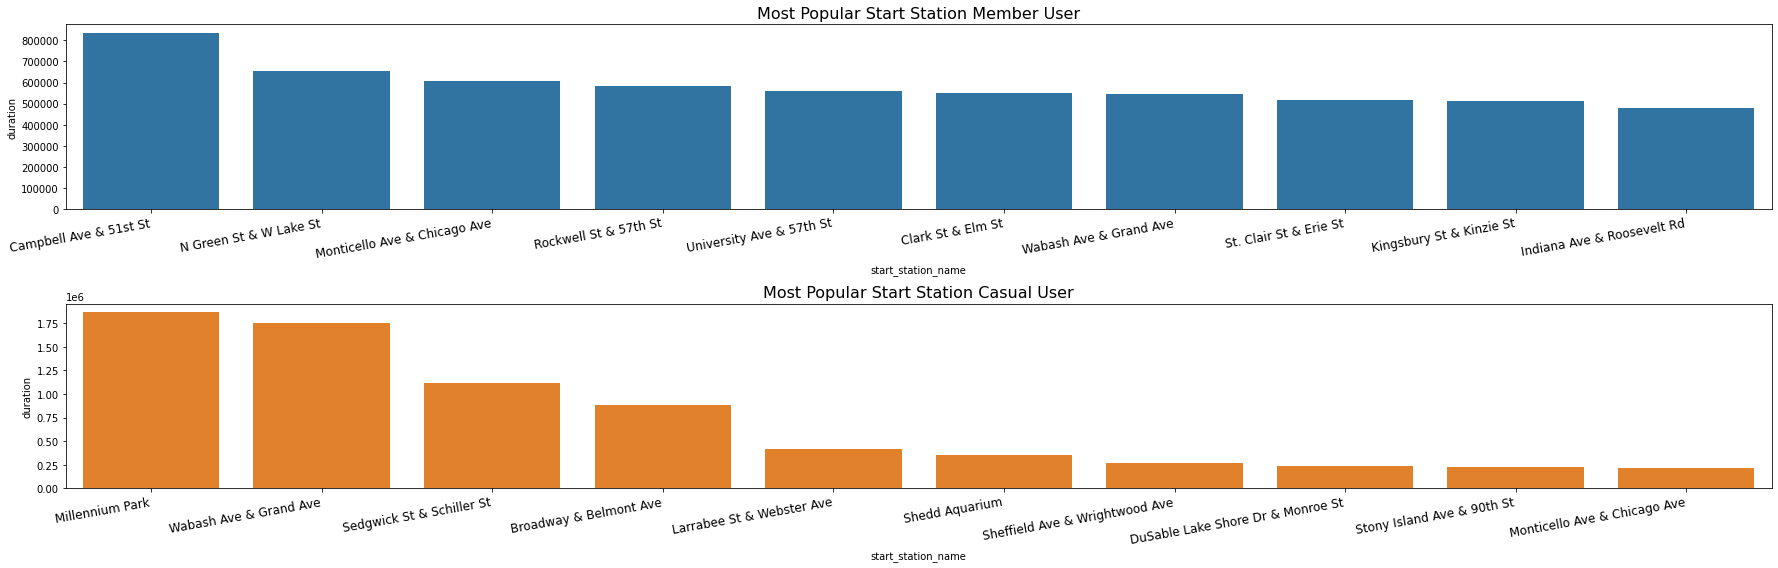

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(25,8))
ax0 = sns.barplot(x='start_station_name', y='duration', data=jan22[jan22['member_casual']=='member'], estimator=sum, color='C0', order=member_start10.index,
                  ax=axes[0], ci=None)
ax1 = sns.barplot(x='start_station_name', y='duration', data=jan22[jan22['member_casual']=='casual'], estimator=sum, color='C1', order=casual_start10.index,
                  ax=axes[1], ci=None)
ax0.set_title('Most Popular Start Station Member User', fontsize=16)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=10, ha="right", fontsize=12)
ax1.set_title('Most Popular Start Station Casual User', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=10, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

- We can see most of the popular station from member user are residential and metropolitan area for cafe, office, clothing shop, etc
- We can see most of the popular station from casual user are tourist area like park, aquarium, seaside, etc
- Much higher peak-valley of data on Casual user compared to Member user graph, implying Member users have more uniform distribution throughout the station (usually for commuting work and school)
- These graphs support the hypothesis which most of the casual user are reguler citizen for relaxation and tourists, and some of them are future potential member

## What This Mean Next?

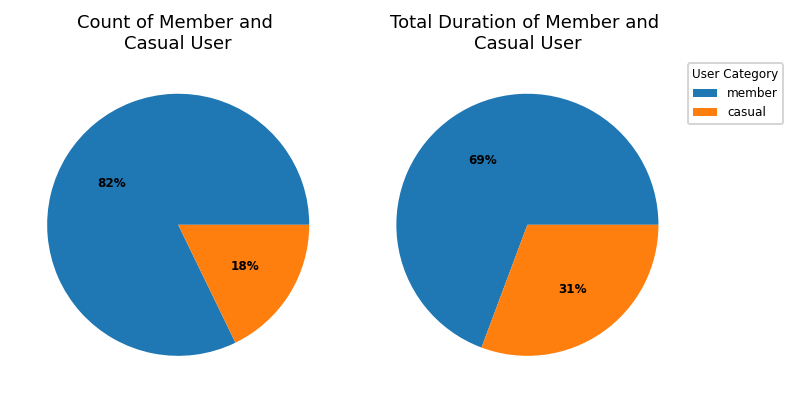

In [ ]:
fig = plt.figure(figsize=(5,5),dpi=144)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pie(jan22['member_casual'].value_counts().values, autopct='%.0f%%', textprops={'fontsize': 6, 'weight':'bold'})
ax1.set_title('Count of Member and \nCasual User', fontsize=9)
ax2.pie(jan22.groupby('member_casual')['duration'].sum().sort_values(ascending=False).values, autopct='%.0f%%', textprops={'fontsize': 6, 'weight':'bold'})
ax2.set_title('Total Duration of Member and \nCasual User', fontsize=9)
plt.tight_layout()
plt.legend(labels=jan22['member_casual'].value_counts().index, title='User Category', title_fontsize=6, loc='center right', bbox_to_anchor=(1, 0.4, 0.3, 1), fontsize=6)
plt.show()

- Despite only contributing only 18% in the number of count ride frequency, casual user manage to contribute 31% of total duration in Jaunary 2022

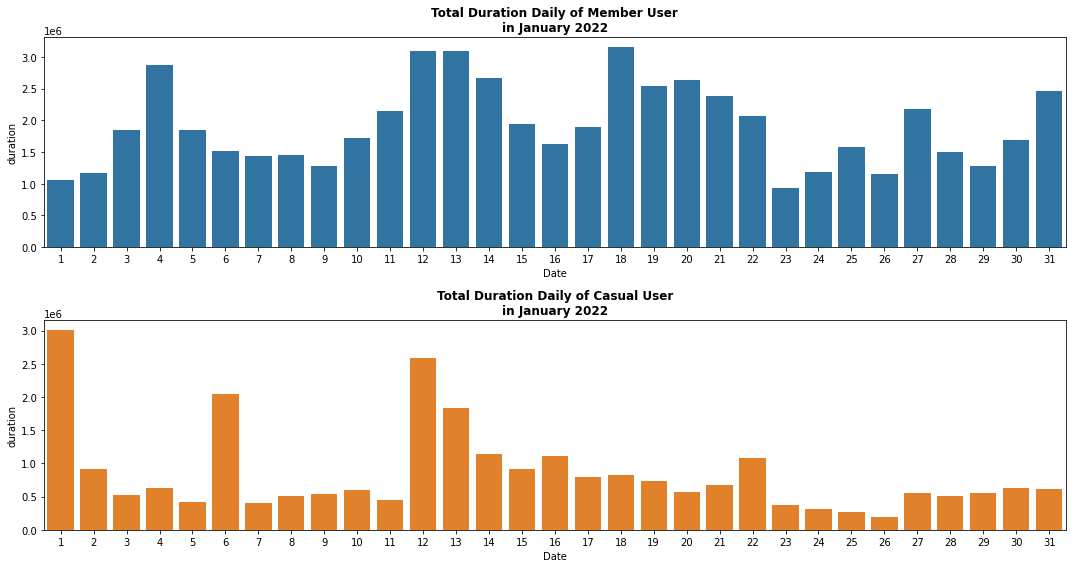

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,8))
ax0 = sns.barplot(x=jan22['started_at'].dt.day, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='member'], color='C0', ax=axes[0], ci=None)
ax1 = sns.barplot(x=jan22['started_at'].dt.day, y='duration', estimator=sum, data=jan22[jan22['member_casual']=='casual'], color='C1', ax=axes[1], ci=None)
ax0.set_title('Total Duration Daily of Member User\nin January 2022', fontweight='bold')
ax0.set_xlabel('Date')
ax1.set_title('Total Duration Daily of Casual User\nin January 2022', fontweight='bold')
ax1.set_xlabel('Date')
plt.tight_layout()

- Despite the high potential, casual user is hard to predict
- We must cater the high potential casual user into joining membership

#### Suggestion

Our focus shuold be prioritized on Casual user, since most of the Member user started as Casual user. We knew Casual user is mostly at the place for sightseeing, so they are our main target! 

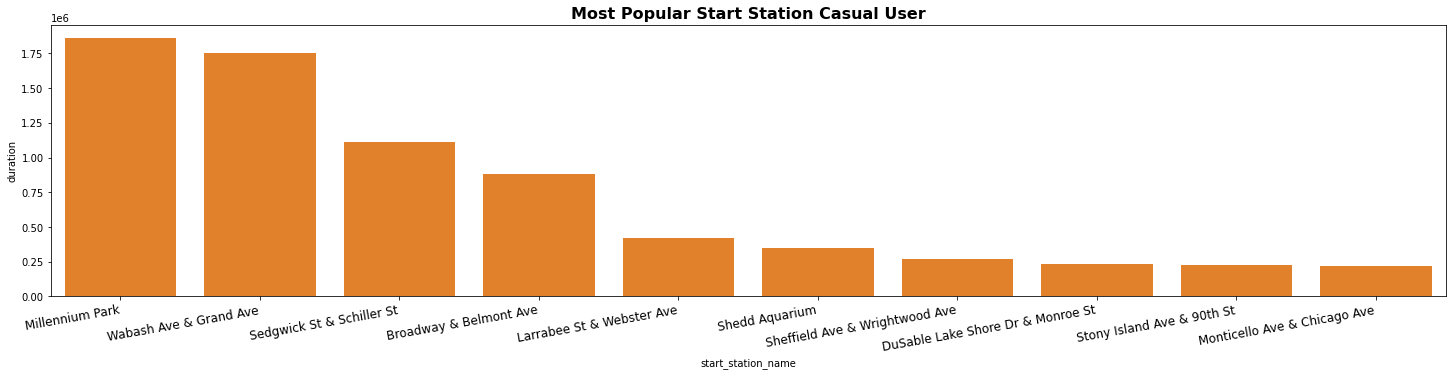

In [ ]:
plt.figure(figsize=(25,5))
ax0 = sns.barplot(x='start_station_name', y='duration', data=jan22[jan22['member_casual']=='casual'], estimator=sum, color='C1', order=casual_start10.index,
                  ci=None)
ax0.set_title('Most Popular Start Station Casual User', fontsize=16, fontweight='bold')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=10, ha="right", fontsize=12)
plt.show()

In [ ]:
casual10 = casual_start10.to_frame().reset_index()

In [ ]:
group = []
for i in casual10.index:
  if (i==0) or (i==1):
    group.append('Top 2')
  else:
    group.append('Other')

In [ ]:
group

['Top 2',
 'Top 2',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [ ]:
casual10['group'] = group

Text(0.5, 1.0, 'Distribution of Top 10 Most Popular Station\nAmong Casual User')

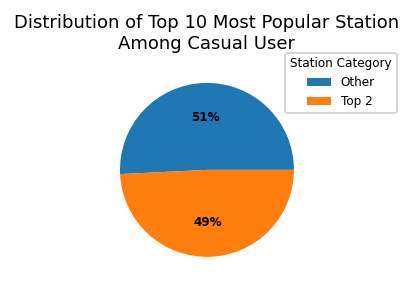

In [ ]:
plt.figure(figsize=(2,2),dpi=144)
plt.pie(casual10.groupby('group')['duration'].sum(), autopct='%.0f%%', textprops={'fontsize': 6, 'weight':'bold'})
plt.legend(labels=casual10['group'].value_counts().index, title='Station Category', title_fontsize=6, loc='center right', bbox_to_anchor=(1, 0.4, 0.4, 1), fontsize=6)
plt.title('Distribution of Top 10 Most Popular Station\nAmong Casual User', fontsize=9)

The distribution among Casual user in the Top 10 Most Popular Station is not equal. Two of the most popular spot raking at 49% total duration alone. We can focus on improving the facility among the other 8, here's my recommendation:
- Coordinating with officials in the respected area to have a bike-friendly road to popular spot (focus the top 10 first)
- Prepare a promo or event during weekend and holiday among the popular spot for bike user
